In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import seffaflik
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

In [3]:
df_prod = uretim.gerceklesen(baslangic_tarihi='2020-06-15', bitis_tarihi='2021-06-15')

In [19]:
df_prod['Toplam'].iloc[:-1]

0       28343.34
1       26835.48
2       25828.76
3       25247.96
4       25145.03
          ...   
8778    37045.75
8779    37028.95
8780    38172.97
8781    38068.83
8782    37288.01
Name: Toplam, Length: 8783, dtype: float64

create a baseline column, which is the total production values the day before the current day (1-hour, lag)

In [23]:
df_prod['Toplam-1'] = np.ones(len(df_prod)) #baseline

In [24]:
df_prod['Toplam-1'].iloc[:-1] = df_prod['Toplam'].iloc[1:]
df_prod['Toplam-1'].iloc[-1] = df_prod['Toplam'].iloc[-1]

/home/berkaydonmez/anaconda3/envs/general/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
features = ['Doğalgaz', 'Rüzgar', 'Toplam-1']
target = ['Toplam']

In [26]:
X = df_prod[features].values
y = df_prod[target].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

In [28]:
print(np.shape(X_train))
print(np.shape(X_test))

(6939, 3)
(1845, 3)


In [36]:
# define baseline pred and error
baseline_preds = X_test[:, features.index('Toplam-1')]

baseline_errors = abs(baseline_preds - y_test)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5247.25


In [41]:
# instantiate model with 1000 decision trees
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

regressor.fit(X_train, y_train.flatten())

RandomForestRegressor(n_estimators=1000, random_state=42)

In [44]:
predictions = regressor.predict(X_test)

errors = abs(predictions - y_test)

MAE = metrics.mean_absolute_error(y_test, predictions)

print('MAE is:', MAE)

MAE is: 998.441418308948


In [45]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 84.62 %.


In [54]:
regressor.feature_importances_

array([0.02779821, 0.02497576, 0.94722603])

In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method

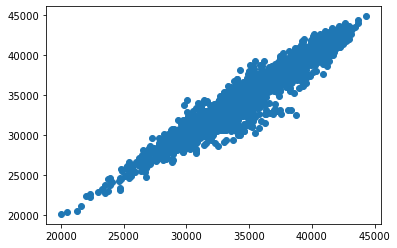

In [48]:
plt.scatter(predictions, y_test)

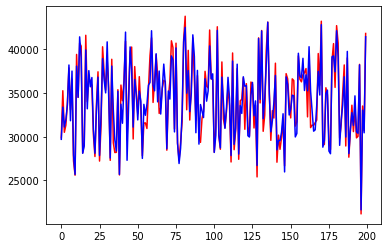

In [53]:
plt.plot(np.arange(len(y_test[:200])), y_test[:200], color='red')
plt.plot(np.arange(len(predictions[:200])), predictions[:200], color='blue')